# Filtering

### First attempt at a solution -1D

Replace each pixel with an average of all the values in its neighborhood - mooving average:

### Averaging assumptions
1. The *true* value of pixels are similar to the true value of pixels nearby.
2. The noise added to each pixel is done independently.

<img src="images/2/Nonuniform.png" width="350px" height="350px">

### Moving average in 2D

<img src="images/2/moving_avarage1.png" width="350px" height="350px">
<img src="images/2/moving_avarage2.png" width="350px" height="350px">
<img src="images/2/moving_avarage3.png" width="350px" height="350px">
<img src="images/2/moving_avarage4.png" width="350px" height="350px">
<img src="images/2/moving_avarage5.png" width="350px" height="350px">

## 1. Correlation filtering - uniform weights

Say the averagin window size is $2k+1 \times 2k+1$:

$$
G[i, j]=\frac{1}{(2k+1)^2}\Sigma^k_{u=-k}\Sigma^k_{v=-k}F[i+u,\ j+v].
$$

- $2k+1$ is odd, so it is odd size window.
If $k$ were $3$ that would be a $7 \times 7$.

- $\Sigma^k_{u=-k}\Sigma^k_{v=-k}F[i+u,\ j+v]$ : Loop over all pixels in neighnorhood around image pixel $F[i,\ j]$.

- $\frac{1}{(2k+1)^2}$ : Uniform weight for each pixel.

__Smoothing with a nonGaussian__
<img src="images/2/uniform_kernel.png" width="400px" height="400px">
<img src="images/2/uniform_kernel_result.png" width="400px" height="400px">

## 2. Correlation filtering - nonuniform weights

Now generalize to allow *different weights* depending on neighboring pixel's relative position:

$$
G[i, j]=\Sigma^k_{u=-k}\Sigma^k_{v=-k}H[u,\ v]F[i+u,\ j+v].
$$

This is called __cross-correlation__, denoted $G = H\otimes F$

- $H[u,\ v]$: 
    - non-uniform weights
    - It is called as the filter *kernel* or *mask*
    - it is the matrix of weights in the linear combination.

__Smoothing with a Gaussian__
<img src="images/2/Gaussian_kernel.png" width="400px" height="400px">
<img src="images/2/Gaussian_kernel_result.png" width="400px" height="400px">

### Code

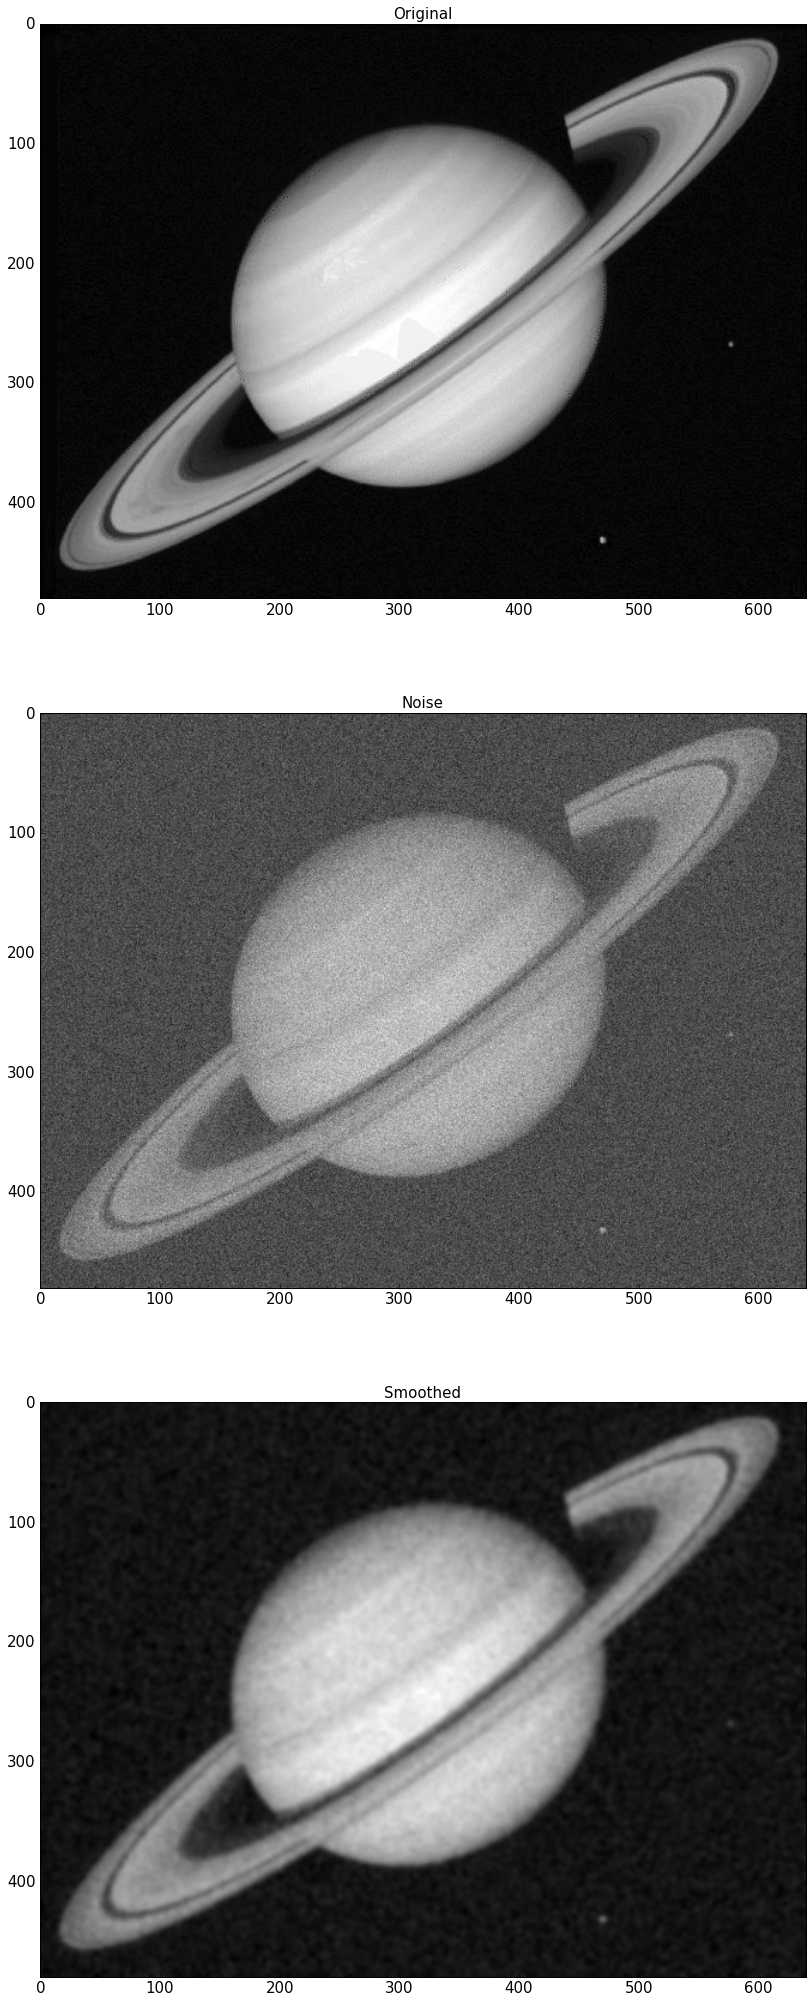

In [103]:
from PIL import Image
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

fig, axis = plt.subplots(3, 1, figsize=(35, 35))

## load an image
img = np.array(Image.open('images/2/saturn.png')) # read image to array
[n, m] = np.shape(img)

axis[0].imshow(img)
axis[0].set_title('Original', fontsize=15)
axis[0].tick_params(axis='x', labelsize=15)
axis[0].tick_params(axis='y', labelsize=15)

## Add some noise
noise_sigma = 25
noise = np.random.randn(n, m)*noise_sigma
noisy_img = img + noise
axis[1].imshow(noisy_img)
axis[1].set_title('Noise', fontsize=15)
axis[1].tick_params(axis='x', labelsize=15)
axis[1].tick_params(axis='y', labelsize=15)

## Create a Gaussian filter

def fspecial_Gaussian(size, sigma):
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/g.sum()
    
filter_size = 25
filter_sigma = 2

gaussian_filter = fspecial_Gaussian(filter_size, filter_sigma)

## Apply Gaussian filter to remove noise
smoothed = scipy.ndimage.filters.correlate(noisy_img, gaussian_filter)
# or
# smoothed = scipy.ndimage.filters.gaussian_filter(noisy_img, sigma=filter_sigma)
axis[2].imshow(smoothed)
axis[2].tick_params(axis='x', labelsize=15)
axis[2].tick_params(axis='y', labelsize=15)
axis[2].set_title('Smoothed', fontsize=15)

plt.gray()
plt.show()

### To sum up

<img src="images/2/final.png" width="400px" height="400px">

[[  1.91516960e-174   2.66919022e-109   1.38389653e-087   2.66919022e-109
    1.91516960e-174]
 [  2.66919022e-109   3.72007598e-044   1.92874985e-022   3.72007598e-044
    2.66919022e-109]
 [  1.38389653e-087   1.92874985e-022   1.00000000e+000   1.92874985e-022
    1.38389653e-087]
 [  2.66919022e-109   3.72007598e-044   1.92874985e-022   3.72007598e-044
    2.66919022e-109]
 [  1.91516960e-174   2.66919022e-109   1.38389653e-087   2.66919022e-109
    1.91516960e-174]]


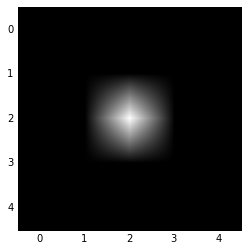

In [102]:
def fgaussian(size, sigma):
     m,n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h, -k:k]
     return np.exp(-(x**2 + y**2)/(2*sigma**2))

def fspecial_Gaussian(size, sigma):
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/g.sum()

a = fspecial_gauss(5, 0.1)
plt.imshow(a)
print(a)